In [1]:
import model
import torch
import torch.nn as nn

C:\Users\user\miniconda3\envs\torchenv\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [2]:
net = model.Segmentator()

In [3]:
rand_im = torch.rand((16, 3, 64, 64))

In [4]:
print(net.toggle_debug())

True


In [5]:
output = net(rand_im)

In [6]:
import matplotlib.pyplot as plt

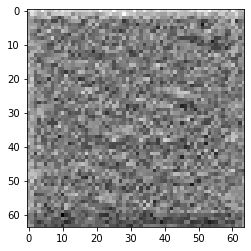

In [7]:
plt.imshow(output[0].detach(), cmap="gray")
plt.show()

In [8]:
import torch.nn.functional as F
def loss(outputs, targets, eps=1e-15, smooth=1., w=1/3):
    bce = F.binary_cross_entropy(outputs, targets, reduction="none")
    intersection = (outputs * targets).sum()
    union = outputs.sum() + targets.sum()
    dice = (2. * intersection + smooth)/(union + eps + smooth)
    return w * bce - (1 - w)*torch.log(dice)